In [ ]:
!pip install augly

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/24.3 MB ? eta -:--:--
   - -------------------------------------- 0.8/24.3 MB 6.2 MB/s eta 0:00:04
   --- ------------------------------------ 2.1/24.3 MB 6.7 MB/s eta 0:00:04
   ------ --------------------------------- 3.7/24.3 MB 6.8 MB/s eta 0:00:04
   --------- ------------------------------ 5.5/24.3 MB 7.4 MB/s eta 0:00:03
   ------------ --------------------------- 7.6/24.3 MB 7.8 MB/s eta 0:00:03
   --------------- ------------------------ 9.2/24.3 MB 8.2 MB/s eta 0:00:02
   --------------- ------------------------ 9.4/24.3 MB 6.7 MB/s eta 0:00:03
   ------------------- -------------------- 12.1/24.3 MB 7.5 MB/s eta 0:00:02
   -------------------- ------------------- 12.6/24.3 MB 7.7 MB/s eta 0:00:02
   ------------------------ --------------- 14.9/24.3 M


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\harin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
# Imports
import kagglehub
import shutil
import os
from PIL import Image

In [8]:
# Dataset download
path = kagglehub.dataset_download("samuelcortinhas/cats-and-dogs-image-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\harin\.cache\kagglehub\datasets\samuelcortinhas\cats-and-dogs-image-classification\versions\4


In [9]:
# Collecting the test dataset

shutil.copytree(os.path.join(path, "test"), "test")

'test'

In [16]:
# Creating a dataset object by combining the images and adding labels

path_c = os.path.join("test", "cats")
path_d = os.path.join("test", "dogs")

images = []
for file in os.listdir(path_c):
    images.append(Image.open(os.path.join(path_c, file)))

for file in os.listdir(path_d):
    images.append(Image.open(os.path.join(path_d, file)))

labels = [1] * len(os.listdir(path_c)) + [0] * len(os.listdir(path_d))

dataset = list(zip(images, labels))

print(dataset[0])

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=615x769 at 0x18DBB52CD70>, 1)


In [25]:
# Seperate objects for train test split

images_c = images[:len(os.listdir(path_c))]
images_d = images[len(os.listdir(path_c)):]


In [26]:
# Train Test Split
from sklearn.model_selection import train_test_split
train_c, test_c = train_test_split(images_c, test_size=0.2, random_state=42)
train_d, test_d = train_test_split(images_d, test_size=0.2, random_state=42)

In [27]:
# Getting the final Train and Test datasets

X_train = train_c + train_d
y_train = [1] * len(train_c) + [0] * len(train_d)
X_test = test_c + test_d
y_test = [1] * len(test_c) + [0] * len(test_d)

In [28]:
# Random Shuffle
import random

random.seed(42)

train = list(zip(X_train, y_train))
test = list(zip(X_test, y_test))

random.shuffle(train)
random.shuffle(test)

X_train, y_train = zip(*train)
X_test, y_test = zip(*test)

In [29]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

112 112 28 28


In [30]:
print(X_test[0], y_test[0])
print(X_train[0], y_train[0])

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x1200 at 0x18DBB5E83E0> 0
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=261x193 at 0x18DBB590FC0> 1


In [38]:
# Augmentations
import augly.image as imaugs

augmentations = [
    imaugs.HFlip(),
    imaugs.VFlip(),
    imaugs.Rotate(degrees=45),
    imaugs.Brightness(factor=1.2),
    imaugs.Contrast(factor=1.2),
    imaugs.Saturation(factor=1.2),
    imaugs.Blur(radius=2.0),
    imaugs.Sharpen(),
    imaugs.Opacity(),
    imaugs.Grayscale(),
]

In [34]:
# Labels

aug_labels = ["HFlip", "VFlip", "Rotate", "Brightness", "Contrast", "Saturation", "Blur", "Sharpen", "Opacity", "Grayscale"]

In [49]:
# Function to return two augmentations for each image

def augment(image):
    augmented_images = []
    augmented_labels = []
    for i in range(2):
        im = image.copy()
        aug= random.sample(aug_labels,3)
        print(i+1,  aug)
        augmented_labels.append([aug_labels.index(i) for i in aug])
        
        for a in aug:
            im = augmentations[aug_labels.index(a)](im)
        augmented_images.append(im)
    return augmented_images, augmented_labels



In [53]:
aug_im, aug_l = augment(X_train[0])

1 ['Contrast', 'Brightness', 'HFlip']
2 ['Sharpen', 'VFlip', 'Rotate']


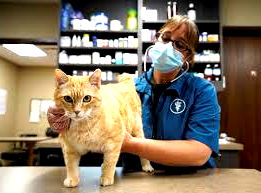

In [54]:
aug_im[0]

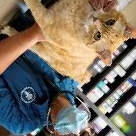

In [55]:
aug_im[1]

In [56]:
# Augmenting the entire dataset

augmented_images = list(X_train)
augmented_labels = list(y_train)

for i in range(len(X_train)):
    im = X_train[i]
    aug_im, aug_l = augment(im)
    augmented_images.extend(aug_im)
    augmented_labels.extend([y_train[i]] * 2)

1 ['Contrast', 'Opacity', 'Blur']
2 ['Brightness', 'Contrast', 'Blur']
1 ['Opacity', 'Sharpen', 'VFlip']
2 ['Opacity', 'Brightness', 'Grayscale']
1 ['VFlip', 'HFlip', 'Saturation']
2 ['Brightness', 'Opacity', 'Rotate']
1 ['Brightness', 'Sharpen', 'Blur']
2 ['Blur', 'Grayscale', 'Sharpen']
1 ['VFlip', 'HFlip', 'Blur']
2 ['Brightness', 'Grayscale', 'Sharpen']
1 ['VFlip', 'Sharpen', 'Grayscale']
2 ['VFlip', 'Brightness', 'Rotate']
1 ['HFlip', 'Rotate', 'Blur']
2 ['Sharpen', 'Contrast', 'Blur']
1 ['Sharpen', 'Rotate', 'Brightness']
2 ['Opacity', 'HFlip', 'Saturation']
1 ['Opacity', 'Rotate', 'HFlip']
2 ['Grayscale', 'VFlip', 'Brightness']
1 ['Grayscale', 'HFlip', 'VFlip']
2 ['Contrast', 'Brightness', 'Saturation']
1 ['Contrast', 'Sharpen', 'Saturation']
2 ['Grayscale', 'VFlip', 'Opacity']
1 ['Saturation', 'VFlip', 'Brightness']
2 ['Contrast', 'Opacity', 'HFlip']
1 ['VFlip', 'Rotate', 'Contrast']
2 ['Contrast', 'Grayscale', 'Brightness']
1 ['Contrast', 'Opacity', 'Sharpen']
2 ['Blur', 'Cont

In [ ]:
# Dataset comparison

print(len(X_train), len(augmented_images))
print(len(y_train), len(augmented_labels))
print(len(X_test), len(y_test))



112 336
112 336
28 28


<BarContainer object of 2 artists>

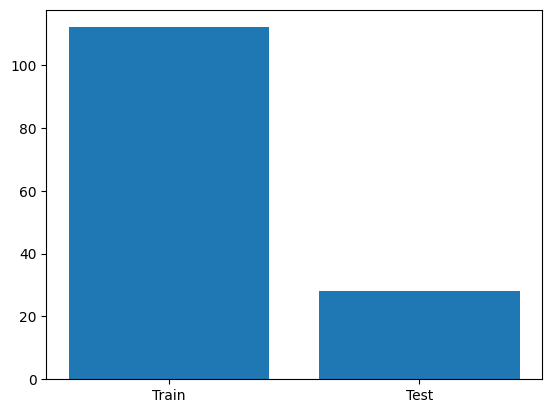

In [90]:
# Plots for comparison
import matplotlib.pyplot as plt

X_axis = ["Train", "Test"]
Y_axis = [len(X_train), len(X_test)]
plt.bar(X_axis, Y_axis)


<BarContainer object of 2 artists>

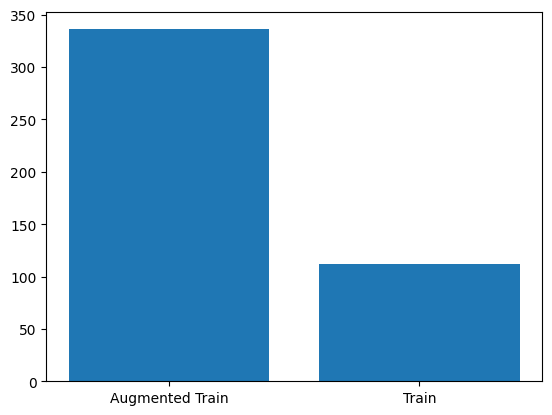

In [91]:
# Augmented vs Non-augmented

X_axis = ["Augmented Train", "Train"]
Y_axis = [len(augmented_images), len(X_train)]
plt.bar(X_axis, Y_axis)

<BarContainer object of 6 artists>

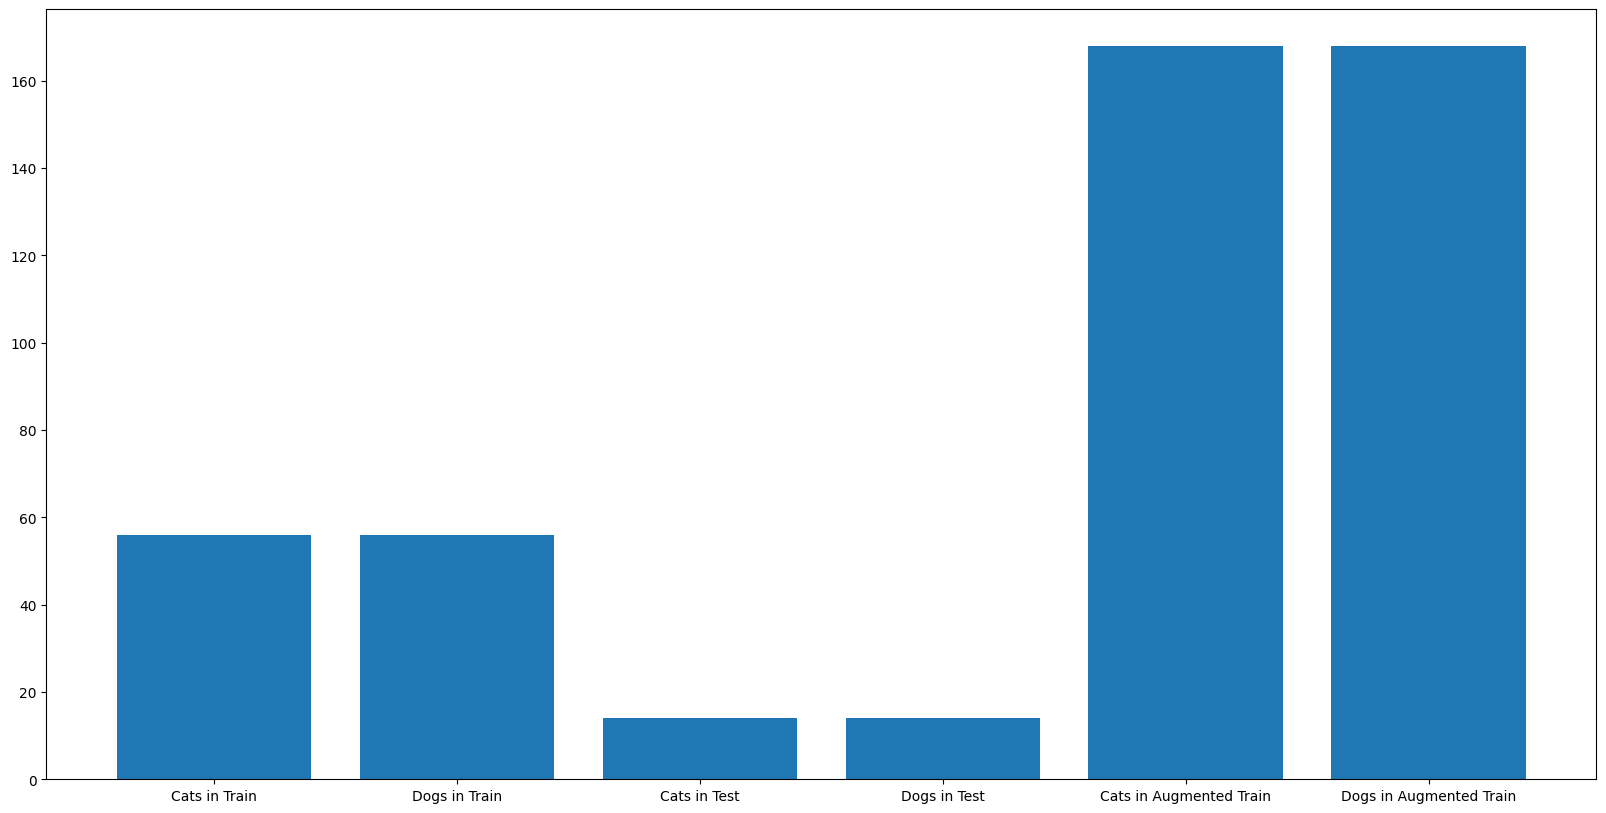

In [96]:
# Number of cats and dogs in the dataset

X_axis = ["Cats in Train", "Dogs in Train", "Cats in Test", "Dogs in Test", "Cats in Augmented Train", "Dogs in Augmented Train"]
Y_axis = [len(train_c), len(train_d), len(test_c), len(test_d), augmented_labels.count(1), augmented_labels.count(0)]

plt.figure(figsize=(20, 10))
plt.bar(X_axis, Y_axis)

In [61]:
# Saving the datasets

os.mkdir("Train")
os.mkdir("Train/cats")
os.mkdir("Train/dogs")

os.mkdir("Test_")
os.mkdir("Test_/cats")
os.mkdir("Test_/dogs")

os.mkdir("Augmented")
os.mkdir("Augmented/cats")
os.mkdir("Augmented/dogs")

for i in range(len(y_train)):
    if y_train[i] == 1:
        augmented_images[i].save(f"Train/cats/{i}.jpg")
    else:
        augmented_images[i].save(f"Train/dogs/{i}.jpg")

for i in range(len(y_test)):
    if y_test[i] == 1:
        X_test[i].save(f"Test_/cats/{i}.jpg")
    else:
        X_test[i].save(f"Test_/dogs/{i}.jpg")

for i in range(len(augmented_labels)):
    if augmented_labels[i] == 1:
        augmented_images[i].save(f"Augmented/cats/{i}.jpg")
    else:
        augmented_images[i].save(f"Augmented/dogs/{i}.jpg")

Model Used - Microsoft ResNet-50 </br>

ResNet-50 is a type of CNN based on residual networks. </br>
ResNet-50 consists of 50 layers divided into 5 blocks, each containing residual blocks. </br>

It mostly contains of Convolutional Layers, Residual Blocks, and Fully Connected Layer. </br>

![Model Diagram](https://wisdomml.in/wp-content/uploads/2023/03/resnet_bannner.png "Model Diagram")

In [ ]:
# Model Training - Using resnet-50 model

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torchvision.models import resnet50
from torch.utils.data import DataLoader


from transformers import ResNetForImageClassification, ResNetConfig



In [63]:
resnet50

<function torchvision.models.resnet.resnet50(*, weights: Optional[torchvision.models.resnet.ResNet50_Weights] = None, progress: bool = True, **kwargs: Any) -> torchvision.models.resnet.ResNet>

In [64]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
# Transformations required for resnet model

torchvision.models.resnet
t = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
    ])



In [ ]:
# Loading the datasets with required transforms
train_data = torchvision.datasets.ImageFolder("Train", transform = t)
test_data = torchvision.datasets.ImageFolder("Test_", transform = t)
augmented_data = torchvision.datasets.ImageFolder("Augmented", transform = t)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=8)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False, num_workers=8)
augmented_loader = DataLoader(augmented_data, batch_size=32, shuffle=True, num_workers=8)


C:\Users\harin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\torch\utils\data\dataloader.py:624: UserWarning: This DataLoader will create 30 worker processes in total. Our suggested max number of worker in current system is 22 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [71]:
# Initializing weights

def weights(w):
    if isinstance(w, nn.Linear):
        torch.nn.init.xavier_uniform_(w.weight.to(dev))
        w.bias.data.fill_(0.01)

In [72]:
# Configuration for Model

config = ResNetConfig.from_pretrained("microsoft/resnet-50", num_labels=2)
model = ResNetForImageClassification(config)
model.apply(weights)
model.to(dev)

loss = nn.CrossEntropyLoss()
op = optim.Adam(model.parameters(), lr=0.001)

In [73]:
dev

device(type='cpu')

In [74]:
model.config

ResNetConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "ResNetForImageClassification"
  ],
  "depths": [
    3,
    4,
    6,
    3
  ],
  "downsample_in_bottleneck": false,
  "downsample_in_first_stage": false,
  "embedding_size": 64,
  "hidden_act": "relu",
  "hidden_sizes": [
    256,
    512,
    1024,
    2048
  ],
  "layer_type": "bottleneck",
  "model_type": "resnet",
  "num_channels": 3,
  "out_features": [
    "stage4"
  ],
  "out_indices": [
    4
  ],
  "stage_names": [
    "stem",
    "stage1",
    "stage2",
    "stage3",
    "stage4"
  ],
  "torch_dtype": "float32",
  "transformers_version": "4.48.3"
}

In [75]:
 # Running the model for original dataset for 25 epochs

for epoch in range(25):
    model.train()
    t_loss = 0.0

    for i, l in train_loader:
        i, l = i.to(dev), l.to(dev)
        op.zero_grad()

        o = model(i).logits
        loss_ = loss(o, l)
        loss_.backward()

        op.step()

        t_loss += loss_.item() / len(train_loader)
    
    print(f"Epoch: {epoch+1}, Loss: {t_loss}")


Epoch: 1, Loss: 4.630619943141937
Epoch: 2, Loss: 2.025679647922516
Epoch: 3, Loss: 1.1655306667089462
Epoch: 4, Loss: 1.0469556152820587
Epoch: 5, Loss: 1.0629083067178726
Epoch: 6, Loss: 0.7858054786920547
Epoch: 7, Loss: 0.6671114563941956
Epoch: 8, Loss: 0.5423027947545052
Epoch: 9, Loss: 0.4543495550751686
Epoch: 10, Loss: 0.42380084097385406
Epoch: 11, Loss: 0.6352746933698654
Epoch: 12, Loss: 0.4622664488852024
Epoch: 13, Loss: 0.3663935661315918
Epoch: 14, Loss: 0.2415943145751953
Epoch: 15, Loss: 0.26842835173010826
Epoch: 16, Loss: 0.05484136426821351
Epoch: 17, Loss: 0.15332785435020924
Epoch: 18, Loss: 0.08358192536979914
Epoch: 19, Loss: 0.13764037797227502
Epoch: 20, Loss: 0.38711723033338785
Epoch: 21, Loss: 0.41763119027018547
Epoch: 22, Loss: 0.2220132164657116
Epoch: 23, Loss: 0.41646048426628113
Epoch: 24, Loss: 0.23984359204769135
Epoch: 25, Loss: 0.15873041516169906


In [76]:
# Evaluation

model.eval()
acc = 0

labels_e = []
pred_e = []

with torch.no_grad():
    for i, l in test_loader:
        i, l = i.to(dev), l.to(dev)
        o = model(i).logits
        
        _, pred = torch.max(o, 1)
        acc += torch.sum(pred == l).item()


        labels_e.extend(l.cpu().numpy())
        pred_e.extend(pred.cpu().numpy())

print(f"Accuracy: {acc/len(test_data)}")

Accuracy: 0.4642857142857143


In [77]:
# Metrics for original train dataset
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

accuracy = accuracy_score(labels_e, pred_e)
precision = precision_score(labels_e, pred_e)
recall = recall_score(labels_e, pred_e)
f1 = f1_score(labels_e, pred_e)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.4642857142857143
Precision: 0.46153846153846156
Recall: 0.42857142857142855
F1 Score: 0.4444444444444444


<Axes: >

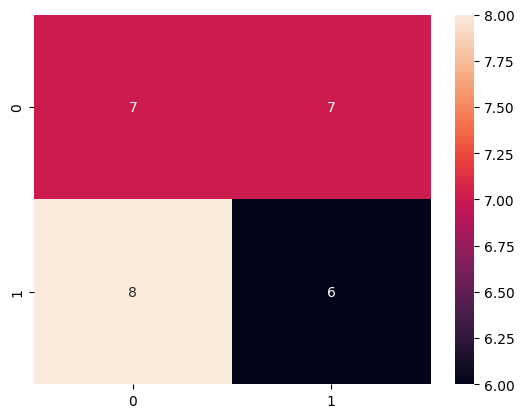

In [79]:
# Confusion Matrix
confusion = confusion_matrix(labels_e, pred_e)

import seaborn as sns

sns.heatmap(confusion, annot=True)

In [80]:
# Resetting the model for augmented dataset

model = ResNetForImageClassification(config)
model.apply(weights)
model.to(dev)

op = optim.Adam(model.parameters(), lr=0.001)

In [81]:
 # Running the model for the augmented dataset for 25 epochs

for epoch in range(25):
    model.train()
    t_loss = 0.0

    for i, l in augmented_loader:
        i, l = i.to(dev), l.to(dev)
        op.zero_grad()

        o = model(i).logits
        loss_ = loss(o, l)
        loss_.backward()

        op.step()

        t_loss += loss_.item() / len(train_loader)
    
    print(f"Epoch: {epoch+1}, Loss: {t_loss}")


Epoch: 1, Loss: 7.369401633739471
Epoch: 2, Loss: 2.2313592433929443
Epoch: 3, Loss: 2.222914829850197
Epoch: 4, Loss: 2.1626372560858727
Epoch: 5, Loss: 1.7510963678359985
Epoch: 6, Loss: 1.6339795887470245
Epoch: 7, Loss: 1.464155375957489
Epoch: 8, Loss: 1.295193500816822
Epoch: 9, Loss: 1.2490241937339306
Epoch: 10, Loss: 1.1563677750527859
Epoch: 11, Loss: 0.9765639752149582
Epoch: 12, Loss: 0.829230222851038
Epoch: 13, Loss: 0.3767110239714384
Epoch: 14, Loss: 0.527604574803263
Epoch: 15, Loss: 1.2286873795092106
Epoch: 16, Loss: 0.7850294522941113
Epoch: 17, Loss: 0.5460065323859453
Epoch: 18, Loss: 0.32298338040709496
Epoch: 19, Loss: 0.33180577913299203
Epoch: 20, Loss: 0.3661112356930971
Epoch: 21, Loss: 0.5485854260623455
Epoch: 22, Loss: 0.3811315791681409
Epoch: 23, Loss: 0.3621367225423455
Epoch: 24, Loss: 0.27766924956813455
Epoch: 25, Loss: 0.247064741095528


In [82]:
# Evaluation

model.eval()
acc = 0

labels_e = []
pred_e = []

with torch.no_grad():
    for i, l in test_loader:
        i, l = i.to(dev), l.to(dev)
        o = model(i).logits 
        
        _, pred = torch.max(o, 1)
        acc += torch.sum(pred == l).item()


        labels_e.extend(l.cpu().numpy())
        pred_e.extend(pred.cpu().numpy())

print(f"Accuracy: {acc/len(test_data)}")

Accuracy: 0.42857142857142855


In [83]:
# Metrics

accuracy = accuracy_score(labels_e, pred_e)
precision = precision_score(labels_e, pred_e)
recall = recall_score(labels_e, pred_e)
f1 = f1_score(labels_e, pred_e)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.42857142857142855
Precision: 0.4375
Recall: 0.5
F1 Score: 0.4666666666666667


<Axes: >

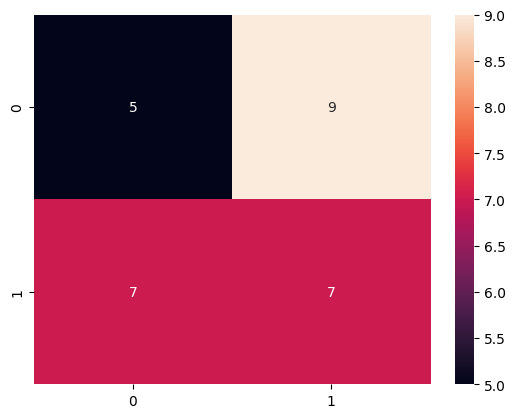

In [84]:
# Confusion Matrix
confusion = confusion_matrix(labels_e, pred_e)

import seaborn as sns

sns.heatmap(confusion, annot=True)

### Inferences:

| Metrics | Original | Augmented |
| -------- | -------- | -------- |
| Accuracy | 0.46 | 0.43 |
| Precision | 0.46 | 0.44 |
| Recall | 0.43 | 0.5 |
| F1 Score | 0.44 | 0.47 |

We have used a pretrained resnet-50 model which is fine-tuned based on the given train data. </br>

We ran both the models for 25 epochs on the train data (obtained from a random split from the test data from the dataset) and the augmented data (obtained by random set of three augmentations from the train data). </br>

It can be observed that there is no significant change in both the models as the data set size is very low and there isn't much information gain from the augmentations as they are randomly selected from a set of ten augmentations which might not be very helpful. </br>

We tried running the same model on different set of epochs, augmentations, dataset size.

### References:

https://pytorch.org/vision/main/models/generated/torchvision.models.resnet50.html </br>
https://learn.microsoft.com/en-us/dotnet/api/microsoft.ml.resnet50extension.resnet50?view=ml-dotnet-preview </br>
https://augly.readthedocs.io/en/latest/index.html </br>
https://wisdomml.in/understanding-resnet-50-in-depth-architecture-skip-connections-and-advantages-over-other-networks/ </br>